# Statisitical Analysis of 2019 Housing Prices in King County, Washington

---

## Purpose of Analysis

This project tries to validate the following questions regarding housing prices in King County for the year 2019:

1. Does having higher square footage increase home sale price?
2. Does having a porch increase home sale price?
3. Does having a beach or lake front increase home sale price?


---

## Data

For our analysis, we used the King County House Sales dataset, narrowed down to all homes **sold in 2019**.

The dataset itself was a combination of the following datatables, all of which we individually retrieved from King County's website:
- Real Property Sales
- Residential Building
- Parcel

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

import scipy.stats as stats
import pylab

from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#### ---

### Real Property Sales:

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip

In [ ]:
! unzip -o ../../data/raw/"Real Property Sales.zip"

In [3]:
real_prop_sales_df = pd.read_csv('../../data/EXTR_RPSale.csv', encoding='latin-1')

/Users/oz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Changing Document Date column to datetime object for sorting:

In [4]:
real_prop_sales_df['DocumentDate'] = pd.to_datetime(real_prop_sales_df.DocumentDate)

#### Picking sales data from 2019:

In [9]:
real_prop_sales_2019_df = real_prop_sales_df[(real_prop_sales_df.DocumentDate > '2019') & (real_prop_sales_df.DocumentDate < '2020')]

#### Dropping rows where there is no sales price:

In [18]:
real_prop_sales_2019_df.SalePrice.dropna(inplace=True)

In [10]:
real_prop_sales_2019_df.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
47,3028464,640331,10,2019-12-31,0,20200102000331,,,,,,,WARNER NANCY L,WARNER NANCY L+WARNER CREDIT SHELTER TRUST TODD GR,11,6,15,N,N,N,N,1,8,
56,3004740,40510,150,2019-07-12,0,20190814000349,,,,,,,GILLESPIE CAROL A+RICHARD W,GILLESPIE CAROL A+RICHARD W+ET AL,11,6,15,N,N,N,N,1,8,
78,3031504,766620,3538,2019-12-30,0,20200128000956,,,,,,,NCEP V LLC,LEMMAN PETER R+DEAN+CARVER CALLIE ANNE 215 STOCK T,3,11,15,N,N,N,N,16,2,11 18 20 31
86,3015264,124550,98,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52
215,2980836,937630,695,2019-03-28,550000,20190404001008,,,,,,,WOLFE BRUCE A+MEGAN D,ALBRECHT BRYSON+ALBRECHT STEPHEN+KATHERINE BERNDT,3,6,3,N,N,N,N,1,8,


#### ---

### Residential Building:

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip

In [ ]:
! unzip -o ../../data/raw/"Residential Building.zip"

In [7]:
res_bldg_df = pd.read_csv('../../data/EXTR_ResBldg.csv')
res_bldg_df.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,32604,9114,1,1,3520 NE 189TH PL 98155,3520,,NE,189TH,PL,,98155,1.0,7,0,1470,0,0,0,0,0,2250,780,780,6,0,530,Y,0,0,280,5,3,0,N,3,1,1,1,0,1,0,1,1975,0,0,0,0,3,0
1,32606,9012,1,1,23422 NE 188TH ST 98077,23422,,NE,188TH,ST,,98077,2.0,8,0,1340,0,990,0,0,0,2330,0,0,0,0,710,,0,0,0,5,2,0,,3,1,0,2,1,0,0,0,1991,0,0,0,0,3,0
2,32606,9039,1,1,19800 242ND AVE NE 98077,19800,,,242ND,AVE,NE,98077,2.0,9,0,1720,0,780,0,50,0,2450,0,0,0,0,0,,180,0,0,5,3,0,,3,0,0,2,0,0,0,0,2000,0,0,0,0,3,0
3,32606,9044,1,1,18917 244TH AVE NE 98077,18917,,,244TH,AVE,NE,98077,2.0,10,0,1860,0,1830,0,0,0,3690,0,0,0,0,950,,780,0,0,5,3,0,,4,1,0,3,2,0,0,0,2002,0,0,0,0,3,0
4,32606,9045,1,1,18926 240TH AVE NE 98077,18926,,,240TH,AVE,NE,98077,1.0,4,0,740,0,0,0,0,0,740,0,0,0,0,0,,0,0,220,8,7,0,,2,0,0,1,0,0,1,0,1974,0,0,0,0,2,0


#### ---

### Parcel:

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip

In [ ]:
! unzip -o ../../data/raw/"Parcel.zip"

In [8]:
parceldf = pd.read_csv('../../data/EXTR_Parcel.csv', encoding='latin-1')
parceldf.head()

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,785662,370,Single Family Residence,SOMERSET HIGHLANDS NO. 03,37,1,5,24,15,SE,R,31.0,8.0,NaN,NaN,BELLEVUE,330,R-3.5,1,1,2,10300,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,990600,25,,ZWICKS 1ST ADD,5,1 &,3,25,13,NE,R,42.0,11.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,5000,2,2,4,0,1,0,2,0,False,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,286210,320,,GRAHAMS A B UNIVERSITY ADD,16,3,4,25,8,SE,R,44.0,6.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,4280,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,264800,225,duplex,FRENCHS ADD TO SLAUGHTER,6 THRU 9,2,5,21,18,NE,R,28.0,11.0,NaN,NaN,AUBURN,133,R10,6,1,3,12100,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,1,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,689181,90,,PRESTIGE HEIGHTS DIV NO 02,9,,4,26,2,SE,R,4.0,4.0,NaN,NaN,KENMORE,1442,R6,1,1,2,11554,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


#### ---

### Merging all datatables:

Once we had all our data tables, we combined them into one big dataframe along the 'major' and 'minor' columns within each data table.

#### Joining 'real property sales' with 'parcel', along 'major' and 'minor' columns:

In [13]:
rps2019_parcel_dfmerge = pd.merge(real_prop_sales_2019_df, parceldf, how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])

#### Joining above dataframe to 'residential building', along 'major' and 'minor' columns:

In [15]:
rps2019_parcel_resbldg_dfmerge = pd.merge(rps2019_parcel_dfmerge, res_bldg_df, how='left', left_on=['Major', 'Minor'], right_on=['Major','Minor'])

#### Setting Sales Price as the first column:

In [16]:
cols = list(rps2019_parcel_resbldg_dfmerge.columns)
cols = [cols[4]] + cols[:4] + cols[5:]
rps2019_parcel_resbldg_dfmerge = rps2019_parcel_resbldg_dfmerge[cols]

In [17]:
rps2019_parcel_resbldg_dfmerge.head()

,SalePrice,ExciseTaxNbr,Major,Minor,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,0,3028464,640331,10,2019-12-31,20200102000331,,,,,,,WARNER NANCY L,WARNER NANCY L+WARNER CREDIT SHELTER TRUST TODD GR,11,6,15,N,N,N,N,1,8,,,ORCHARD PARK LANE,1,,5.0,26.0,33.0,SE,R,93.0,7.0,NaN,NaN,KIRKLAND,1701.0,RSX 7.2,1.0,1.0,2.0,7700.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,10638 128TH AVE NE 98033,10638,,,128TH,AVE,NE,98033,1.0,8.0,0.0,1460.0,0.0,0.0,0.0,0.0,0.0,1460.0,0.0,0.0,0.0,0.0,500.0,N,0.0,0.0,0.0,5.0,2.0,0.0,N,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1976.0,0.0,0.0,0.0,0.0,4.0,0.0
1,0,3004740,40510,150,2019-07-12,20190814000349,,,,,,,GILLESPIE CAROL A+RICHARD W,GILLESPIE CAROL A+RICHARD W+ET AL,11,6,15,N,N,N,N,1,8,,,BALCHS ALBERT PARK HIGHLANDS ADD,10,2,3.0,26.0,12.0,SE,R,1.0,3.0,NaN,NaN,SHORELINE,2263.0,R6,1.0,1.0,2.0,7800.0,2.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,107 N 168TH ST 98133,107,,N,168TH,ST,,98133,1.0,7.0,0.0,1510.0,0.0,0.0,0.0,0.0,0.0,1510.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,5.0,2.0,0.0,,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1955.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0,3031504,766620,3538,2019-12-30,20200128000956,,,,,,,NCEP V LLC,LEMMAN PETER R+DEAN+CARVER CALLIE ANNE 215 STOCK T,3,11,15,N,N,N,N,16,2,11 18 20 31,NORTH COAST LIGHTING,SEATTLE TIDE LDS BL 01-376,POR,252 &,4.0,24.0,8.0,SE,C,35.0,10.0,NaN,NaN,SEATTLE,10.0,IG2 U/85,15.0,1.0,195.0,108464.0,2.0,2.0,4.0,0.0,0.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,193000,3015264,124550,98,2019-09-27,20191015000395,,,,,,,LEWIS WILBERT,TALOF

#### ---


Once we had our combined dataframe, we defined what a 'house sale' was:
- **Single family homes**: Properties containing 1 living unit per property. (no duplexes, apartments, condominiums, etc.)
- **Residential**. (no commercial properties)
- Sales price between **\\$50,000 and \\$2,000,000**.
- Properties containing **greater than 500 sq ft**.

We narrowed our combined dataframe to the data that only met the above criterion:

In [21]:
all_merged_filtered = rps2019_parcel_resbldg_dfmerge[(rps2019_parcel_resbldg_dfmerge.SalePrice > 50000) & (rps2019_parcel_resbldg_dfmerge.SalePrice < 2000000) & 
                                              (rps2019_parcel_resbldg_dfmerge.PrincipalUse == 6) & 
                                              (rps2019_parcel_resbldg_dfmerge.PropertyType.isin([11,3,2,10])) & 
                                              (rps2019_parcel_resbldg_dfmerge.PresentUse.isin([2.0, 29.0])) & 
                                              (rps2019_parcel_resbldg_dfmerge.NbrLivingUnits == 1.0) & 
                                              (rps2019_parcel_resbldg_dfmerge.SqFtTotLiving > 500)]

In [22]:
all_merged_filtered.head()

,SalePrice,ExciseTaxNbr,Major,Minor,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
3,193000,3015264,124550,98,2019-09-27,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,,BURKE-FARRARS KIRKLAND DIV NO. 29,18-19-20,144,5.0,26.0,31.0,SE,R,74.0,8.0,NaN,NaN,KIRKLAND,1701.0,RS 7.2,1.0,1.0,2.0,9670.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,1.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,9823 FORBES CREEK DR 98033,9823,,,FORBES CREEK,DR,,98033,1.0,7.0,0.0,1140.0,0.0,0.0,0.0,0.0,0.0,1760.0,1030.0,620.0,6.0,410.0,100.0,,0.0,0.0,220.0,5.0,2.0,0.0,,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,3.0,0.0
4,550000,2980836,937630,695,2019-03-28,20190404001008,,,,,,,WOLFE BRUCE A+MEGAN D,ALBRECHT BRYSON+ALBRECHT STEPHEN+KATHERINE BERNDT,3,6,3,N,N,N,N,1,8,,,WHITMAN THE ADD TO BALLARD,43,3,3.0,25.0,1.0,NW,R,82.0,11.0,NaN,NaN,SEATTLE,10.0,RSL (M),1.0,1.0,2.0,2500.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,8013 11TH AVE NW 98117,8013,,,11TH,AVE,NW,98117,3.0,8.0,0.0,370.0,0.0,540.0,650.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,240.0,N,0.0,0.0,200.0,4.0,3.0,0.0,N,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1985.0,0.0,0.0,0.0,0.0,3.0,0.0
7,648500,2982060,347050,40,2019-04-04,,,,,,,,BROWN MARK E+MARCIE K,MEDVED ROBERT J+JENNIFER E,11,6,3,N,N,N,N,1,8,,,HOTSON ESTATES,4,,6.0,22.0,27.0,NW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813.0,R-4,1.0,1.0,2.0,5250.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,26034 231ST PL SE,26034,,,231ST,PL,SE,NaN,2.0,8.0,0.0,1390.0,0.0,1910.0,0.0,0.0,0.0,3300.0,0.0,0.0,0.0,0.0,590.0,,0.0,0.0,0.0,5.0,2.0,0.0,,5.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2005.0,0.0,0.0,0.0,0.0,3.0,6000.0
8,1445000,3003196,188780,340,2019-07-23,20190802001114,,,,,,,MAINVUE WA LLC,PANDEY ASEEM+MAMTA,10,6,3,N,

---

## Regression modeling

We picked our pool of features via 2 methods:
1. We chose the features which interested us in relation to the Sale Price
2. We looked at the correlation matrix and picked features which had a high correlation with Sale Price, which we hadn't picked earlier.

We were left with the following pool of features:

In [47]:
all_merged_final.corr()

,SalePrice,SaleInstrument,HBUAsIfVacant,BldgGrade,SqFtLot,SqFtTotLiving,SqFt1stFloor,SqFt2ndFloor,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageAttached,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,WfntLocation,WfntFootage,SaleReason
SalePrice,1.000000,-0.135289,0.004973,0.620904,-0.020008,0.587633,0.315740,0.387566,0.208077,0.218723,0.192934,0.166135,0.296922,0.184605,0.186901,0.330300,0.262771,0.005282,0.189441,0.037874,-0.021660,-0.122889
SaleInstrument,-0.135289,1.000000,-0.002778,-0.061413,0.092310,-0.012456,0.019487,-0.024427,0.009022,-0.004892,-0.015341,-0.020987,0.000389,-0.037634,-0.020055,-0.017096,-0.009807,-0.007565,-0.034172,0.035655,0.092665,0.465620
HBUAsIfVacant,0.004973,-0.002778,1.000000,-0.017920,-0.004168,-0.058801,-0.094653,-0.023347,0.004865,-0.003856,0.033358,-0.083936,-0.064872,-0.022196,0.015275,-0.046278,-0.028627,0.017394,0.011420,-0.011088,-0.003165,0.020718
BldgGrade,0.620904,-0.061413,-0.017920,1.000000,-0.043238,0.701321,0.384955,0.601900,0.042687,0.089706,0.109441,0.446679,0.384166,0.367818,0.156441,0.460434,0.296648,-0.016762,0.187774,-0.012965,-0.050339,-0.072357
SqFtLot,-0.020008,0.092310,-0.004168,-0.043238,1.000000,-0.005944,0.009005,-0.011772,-0.010344,-0.008694,-0.017659,-0.000425,-0.055965,-0.010499,-0.011594,-0.029327,0.014405,0.001640,0.004667,0.185000,0.967347,0.072718
SqFtTotLiving,0.587633,-0.012456,-0.058801,0.701321,-0.005944,1.000000,0.635062,0.659906,0.224020,0.337386,0.156862,0.480302,0.649769,0.309157,0.207159,0.586905,0.416438,-0.022868,0.153439,0.015768,-0.020979,-0.046604
SqFt1stFloor,0.315740,0.019487,-0.094653,0.384955,0.009005,0.635062,1.000000,0.106320,0.080947,0.095341,-0.105864,0.412338,0.394627,0.049445,0.151308,0.257570,0.278866,0.003219,0.125676,0.046296,-0.012937,0.020015
SqFt2ndFloor,0.387566,-0.024427,-0.023347,0.601900,-0.011772,0.659906,0.106320,1.000000,-0.309431,-0.247088,-0.229463,0.522045,0.415191,0.420075,-0.021565,0.555513,0.386210,-0.047561,-0.070551,-0.023211,-0.015653,-0.087767
SqFtTotBasement,0.208077,0.009022,0.004865,0.042687,-0.010344,0.224020,0.080947,-0.309431,1.000000,0.850456,0.796025,-0.365794,0.175294,-0.083906,0.258426,-0.001289,-0.078943,0.020936,0.254490,0.007399,-0.011143,0.039013
SqFtFinBasement,0.218723,-0.004892,-0.003856,0.089706,-0.008694,0.337386,0.095341,-0.247088,0.850456,1.000000,0.818925,-0.208968,0.257321,-0.057195,0.288855,0.076736,-0.048900,0.007614,0.278780,0.010370,-0.010852,0.014463


In [38]:
all_merged_final = all_merged_filtered[['SalePrice','DocumentDate','SaleInstrument','HBUAsIfVacant','BldgGrade','SqFtLot','SqFtTotLiving','SqFt1stFloor','SqFt2ndFloor',
                                        'SqFtTotBasement','SqFtFinBasement','FinBasementGrade','SqFtGarageAttached',
                                        'Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount','SqFtOpenPorch','SqFtEnclosedPorch','SqFtDeck',
                                        'WfntLocation','WfntFootage','SaleReason']]

We then did a heat map to further look at how our feature pool correlated with sales price:

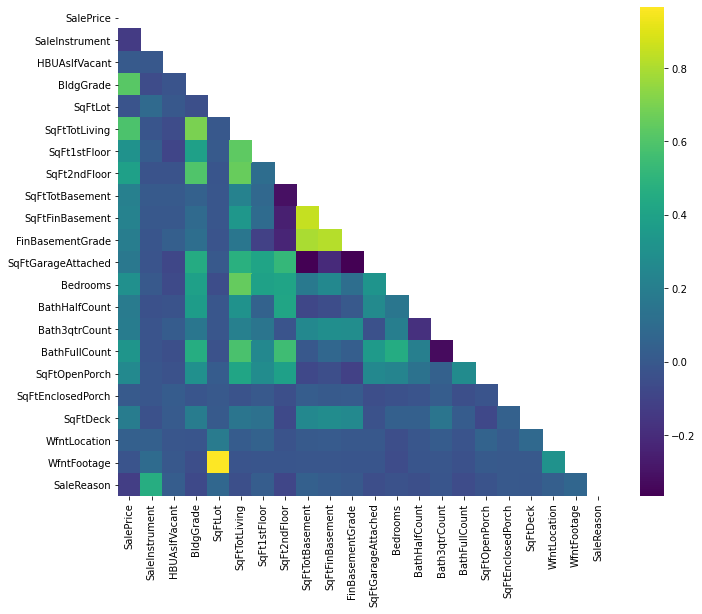

In [39]:
corr = all_merged_final.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

### 1st Model

We only included the following features in our first model: SqFtTotLiving, WfntLocation, SqFtOpenPorch. 

We wanted to see how much of the variance in the Sales Price was attributed to the above features alone

In [50]:
sale_preds = all_merged_final[['SqFtTotLiving','WfntLocation','SqFtOpenPorch']]

model = sm.OLS(all_merged_final.SalePrice, sm.add_constant(sale_preds))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     4653.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:55:55   Log-Likelihood:            -3.6762e+05
No. Observations:               26332   AIC:                         7.353e+05
Df Residuals:                   26328   BIC:                         7.353e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.34e+05   4538.200     51.562      0.000    2.25e+05    2.43e+05
SqFtTotLiving   226.6687      2.146    105.604      0.000     222.462     230.876
WfntLocation   1.251e+04   2252.158      5.553      0.000    8092.718    1.69e+04
SqFtOpenPorch    60.9591     16.437      3.709      0.000      28.742      93.176
==============================================================================
Omnibus:                     2658.732   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4179.858
Skew:                           0.746   Prob(JB):                         0.00
Kurtosis:                       4.259   Cond. No.                     6.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2nd Model

Here we used onehotencoder to break down 2 categorical features: waterfront location, and building grade, and added it back to our final table above.

#### Onehotencoding: Waterfront Location

In [41]:
ohe = OneHotEncoder(sparse=False)

ohe_wfnt = pd.DataFrame(ohe.fit_transform(all_merged_final[['WfntLocation']]), index=all_merged_final.index, 
                        columns=['none','Duwamish','Puget_Sound','Lake_Union','Ship_Canal','Lake_Washington','Lake_Sammamish','Other_Lakes','River/Slough'])


# Dropping dummy variable:

ohe_wfnt.drop('none', axis=1, inplace=True)

ohe_wfnt

,Duwamish,Puget_Sound,Lake_Union,Ship_Canal,Lake_Washington,Lake_Sammamish,Other_Lakes,River/Slough
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
62135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Merging waterfront features to main dataframe:

all_merged_ohe = all_merged_final.join(ohe_wfnt)

#### Onehotencoding: Building Grade

In [43]:
ohe_bldg_grade = pd.DataFrame(ohe.fit_transform(all_merged_final[['BldgGrade']]), index=all_merged_final.index, 
                              columns=['3_Poor','4_Low','5_Fair','6_Low Average','7_Average','8_Good','9_Better','10_Very Good','11_Excellent','12_Luxury','13_Mansion'])


# Dropping dummy variable: 3_poor:

ohe_bldg_grade.drop('3_Poor', axis=1, inplace=True)

ohe_bldg_grade

,4_Low,5_Fair,6_Low Average,7_Average,8_Good,9_Better,10_Very Good,11_Excellent,12_Luxury,13_Mansion
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
62135,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
62137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
62141,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62143,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
# Merging building grade features to main dataframe:

all_merged_ohe = all_merged_ohe.join(ohe_bldg_grade)

#### Running 2nd model with all features from the pool

And then narrowing down features further

In [45]:
sale_preds = all_merged_ohe[list(all_merged_ohe.columns[2:])]

model = sm.OLS(all_merged_ohe.SalePrice, sm.add_constant(sale_preds))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     756.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:47:34   Log-Likelihood:            -3.6368e+05
No. Observations:               26332   AIC:                         7.274e+05
Df Residuals:                   26294   BIC:                         7.277e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.289e+05   2.02e+05      0.637      0.524   -2.68e+05    5.25e+05
SaleInstrument     -7772.7806    456.150    -17.040      0.000   -8666.859   -6878.702
HBUAsIfVacant       8288.8858   2540.182      3.263      0.001    3309.991    1.33e+04
BldgGrade           7.601e+04   2.01e+04      3.789      0.000    3.67e+04    1.15e+05
SqFtLot               -0.0283      0.020     -1.442      0.149      -0.067       0.010
SqFtTotLiving        283.3987      9.033     31.373      0.000     265.693     301.105
SqFt1stFloor        -158.2770      9.008    -17.571      0.000    -175.933    -140.621
SqFt2ndFloor        -143.2625      8.718    -16.432      0.000    -160.351    -126.174
SqFtTotBasement       68.0898      5.887     11.567      0.000      56.551      79.628
SqFtFinBasement     -183.8605     11.669    -15.756      0.000    -206.732    -160.989
FinBasementGrade    -675.0074    908.998     -0.743      0.458   -2456.692    1106.678
SqFtGarageAttached  -177.6668      7.767    -22.873      0.000    -192.891    -162.442
Bedrooms           -2.432e+04   2279.533    -10.671      0.000   -2.88e+04   -1.99e+04
BathHalfCount      -1.819e+04   3475.266     -5.234      0.000    -2.5e+04   -1.14e+04
Bath3qtrCount       2.479e+04   3343.817      7.414      0.000    1.82e+04    3.13e+04
BathFullCount       7850.6074   3571.491      2.198      0.028     850.292    1.49e+04
SqFtOpenPorch        102.8722     14.693      7.001      0.000      74.073     131.671
SqFtEnclosedPorch      2.9998     43.892      0.068      0.946     -83.032      89.031
SqFtDeck              47.5640      7.931      5.997      0.000      32.018      63.110
WfntLocation        5.765e+04   5816.121      9.912      0.000    4.63e+04    6.91e+04
WfntFootage          116.5353     88.099      1.323      0.186     -56.143     289.214
SaleReason         -4853.0242    467.140    -10.389      0.000   -5768.643   -3937.405
Duwamish           -3.472e+04   1.21e+05     -0.287      0.774   -2.72e+05    2.02e+05
Puget_Sound         4.827e+04   3.19e+04      1.514      0.130   -1.42e+04    1.11e+05
Lake_Union          3.244e+05   2.28e+05      1.421      0.155   -1.23e+05    7.72e+05
Ship_Canal          6.973e+05   1.57e+05      4.432      0.000    3.89e+05    1.01e+06
Lake_Washington     2.542e+05   5.16e+04      4.922      0.000    1.53e+05    3.55e+05
Lake_Sammamish      3.451e+05   1.05e+05      3.278      0.001    1.39e+05    5.51e+05
Other_Lakes        -4.627e+05   4.86e+04     -9.528      0.000   -5.58e+05   -3.68e+05
River/Slough       -5.639e+05   5.47e+04    -10.316      0.000   -6.71e+05   -4.57e+05
4_Low              -1.633e+05   1.33e+05     -1.230      0.219   -4.24e+05     9.7e+04
5_Fair             -1.633e+05   1.08e+05     -1.512      0.131   -3.75e+05    4.84e+04
6_Low Average      -2.165e+05   8.96e+

#### Variance inflation factor (VIF) 

We checked for multicollinearity

In [56]:
columns = all_merged_ohe[list(all_merged_ohe.columns[2:])]

In [55]:
vif = pd.DataFrame([variance_inflation_factor(columns.values, i) for i in range(all_merged_ohe.shape[1]-2)], index=columns.columns, columns=['VIF_value'])
vif

/Users/oz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_value
SaleInstrument,1.295091e+00
HBUAsIfVacant,1.018406e+00
BldgGrade,6.292961e+04
SqFtLot,2.194852e+01
SqFtTotLiving,2.887897e+01
SqFt1stFloor,8.120814e+00
SqFt2ndFloor,1.511769e+01
SqFtTotBasement,4.824807e+00
SqFtFinBasement,1.120037e+01
FinBasementGrade,4.780798e+00


#### Narrowing down features

We excluded features which had a high p-value, and many that had high multicollinearity

In [57]:
all_merged_ohe.drop(['BldgGrade','SqFt1stFloor','SqFt2ndFloor','HBUAsIfVacant','SqFtLot','FinBasementGrade','SqFtEnclosedPorch','WfntLocation','WfntFootage',
'Duwamish','4_Low','Other_Lakes','5_Fair','River/Slough'],axis=1,inplace=True)

### 3rd and Final Model

In [58]:
sale_preds = all_merged_ohe[list(all_merged_ohe.columns[2:])]

model = sm.OLS(all_merged_ohe.SalePrice, sm.add_constant(sale_preds))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1092.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:31:45   Log-Likelihood:            -3.6385e+05
No. Observations:               26332   AIC:                         7.278e+05
Df Residuals:                   26306   BIC:                         7.280e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.389e+05   1.49e+04     22.689      0.000     3.1e+05    3.68e+05
SaleInstrument     -8001.0800    457.754    -17.479      0.000   -8898.303   -7103.857
SqFtTotLiving        141.2385      3.827     36.910      0.000     133.738     148.739
SqFtTotBasement       66.4940      5.618     11.836      0.000      55.482      77.506
SqFtFinBasement      -53.9400      7.202     -7.489      0.000     -68.057     -39.823
SqFtGarageAttached  -208.2889      7.389    -28.187      0.000    -222.773    -193.805
Bedrooms           -2.304e+04   2279.952    -10.105      0.000   -2.75e+04   -1.86e+04
BathHalfCount      -1.819e+04   3328.938     -5.463      0.000   -2.47e+04   -1.17e+04
Bath3qtrCount       2.384e+04   3272.571      7.284      0.000    1.74e+04    3.03e+04
BathFullCount       6988.4973   3433.165      2.036      0.042     259.307    1.37e+04
SqFtOpenPorch         98.2516     14.750      6.661      0.000      69.341     127.162
SqFtDeck              48.5815      7.879      6.166      0.000      33.139      64.024
SaleReason         -4798.8393    468.888    -10.235      0.000   -5717.885   -3879.794
Puget_Sound         2.358e+05   2.78e+04      8.465      0.000    1.81e+05     2.9e+05
Lake_Union          5.731e+05   2.43e+05      2.361      0.018    9.73e+04    1.05e+06
Ship_Canal          9.838e+05   1.72e+05      5.731      0.000    6.47e+05    1.32e+06
Lake_Washington     6.112e+05   4.52e+04     13.532      0.000    5.23e+05       7e+05
Lake_Sammamish      7.416e+05   1.21e+05      6.109      0.000    5.04e+05     9.8e+05
6_Low Average       3.035e+04   1.52e+04      2.003      0.045     653.471    6.01e+04
7_Average           1.033e+05   1.48e+04      6.986      0.000    7.43e+04    1.32e+05
8_Good              2.208e+05   1.51e+04     14.606      0.000    1.91e+05     2.5e+05
9_Better            4.415e+05   1.59e+04     27.813      0.000     4.1e+05    4.73e+05
10_Very Good         6.01e+05   1.76e+04     34.093      0.000    5.66e+05    6.36e+05
11_Excellent        7.577e+05    2.3e+04     32.935      0.000    7.13e+05    8.03e+05
12_Luxury           8.123e+05   4.49e+04     18.086      0.000    7.24e+05       9e+05
13_Mansion          8.361e+05   2.44e+05      3.425      0.001    3.58e+05    1.31e+06
==============================================================================
Omnibus:                     3251.286   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7476.633
Skew:                           0.738   Prob(JB):                         0.00
Kurtosis:                       5.154   Cond. No.                     3.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr